## Predicting Chances of Surviving the Titanic Disaster - Neural Networks - Case Study

### Project Scope:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**Your Role:**

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: **Survived** 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 80% and above

### **Data Dictionary:**

The dataset contains several parameters which were recorded about the passengers.
The parameters included are : 

**PassengerId:** Passenger Identifier\
**Survived:** (0 = No, 1 = Yes) \
**Pclass:** - Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd) \
**Name** - Name of the Passenger\
**Sex:**  Gender of the passenger \
**Age:** Age in years  \
**SibSp:** No. of siblings / spouses aboard the Titanic \
**Parch:** No. of parents / children aboard the Titanic \
**Ticket:** Ticket Number \
**Fare:** Passenger Fare\
**Embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)\
**Cabin:**
* U refers to the cabins for the crew members, located in the lower levels of the ship.\
* C, E, and G refers to the cabins for third-class passengers, with C being the highest and G being the lowest level.\
* D refers to the cabins for second-class passengers.\
* A, B, and F refers to the cabins for first-class passengers, with A being the most luxurious and F being the least luxurious.\
* T refers to the cabins for passengers traveling with their automobiles, as the Titanic had a special deck where cars could be loaded and unloaded.

### **Loading the libraries and the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the train.csv file using the pandas `read_csv()` function. 
df = pd.read_csv('Titanic_train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.250,U,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.025,U,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.125,U,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,U,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.000,U,S


#### What features do you think contribute to a high survival rate ?

In [3]:
# Drop the unnecessary ones
df = df.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [4]:
# explore the data quickly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


#### The training set has 891 examples and 11 features + the target variable (survived).

In [5]:
# look at some summary stats
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Survived'].value_counts(normalize = True) #normalize =True to see them in percentage

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**Observation:**
* we can see that 38.4% out of the training-set survived the Titanic
* Age of passengers is between 0.42 & 80 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

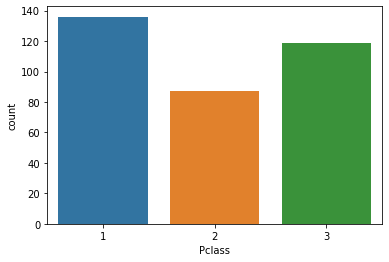

In [7]:
# check if passenger class has anything to do with survival. Plot a bar plot of Pclass vs Survived
sns.countplot(data=df[df['Survived']==1], x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

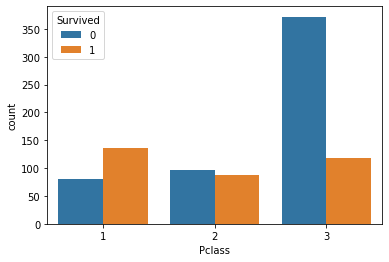

In [8]:
sns.countplot(data=df, x='Pclass', hue='Survived')

<AxesSubplot:>

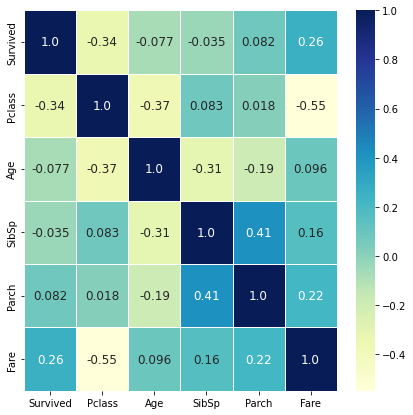

In [9]:
# calculate the correlation of all features with target variable
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu', fmt=".2", linewidths = 0.5, annot_kws={"fontsize":12} )

### Data Prep Required

1. convert object type features into numeric ones.
2. features have different ranges, convert into roughly the same scale. 
3. Some features contain missing values (NaN = not a number) that need to be replaced.

In [10]:
# check for missing data
#df.isna().sum()
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [11]:
# replace nan with 29. (Not Advised)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
# check for dtypes using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [13]:
# Create dummy variables for all 'object' type variables 
df = pd.get_dummies(data=df, columns =['Sex', 'Cabin', 'Embarked'])

In [14]:
# saving this processed dataset
df.to_csv('Processed_Titanic_Dataset.csv', index=None)

### Data Partition

In [15]:
# Separate the input features and target variable
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [16]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify =y, random_state = 100)

In [17]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((712, 19), (179, 19), (712,), (179,))

## **Models**

In [18]:
# from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [19]:
# Train the model
model = MLPClassifier(hidden_layer_sizes =(4,3), max_iter=600)
model.fit(xtrain, ytrain)

# predict on xtest
ypred = model.predict(xtest)

In [20]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.8212290502793296 

[[92 18]
 [14 55]]


## Save Model

In [21]:
#saving a model
import pickle

pickle.dump(model, open('Neural_Model', 'wb')) # RF_model = name of the file, wb means binary form

In [22]:
#loading a model
model = pickle.load(open('Neural_Model', 'rb'))

In [23]:
# Load your test set
df2 = pd.read_csv('Titanic_test.csv')

In [24]:
# Do the data Prep
df2 = df2.drop(['PassengerId','Name', 'Ticket'], axis=1)
df2['Age'].fillna(df2['Age'].mean(), inplace=True)
df2 = pd.get_dummies(data=df2, columns =['Sex', 'Cabin', 'Embarked'])

In [25]:
# In the df2 there is not cabin_T, we'll have to create it
df2["Cabin_T"] = 0

In [26]:
# the columns have to be in the same order than in the training set, let's rearrange them
cols = list(xtrain.columns)
df2 = df2.reindex(columns=cols)

In [27]:
# Predict
model.predict(df2)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,